- What are underfitting and overfitting? How do you avoid them?

- Underfitting: model is too simple , low training accuracy
Underfitting is model is too simple when our machine learning model has not learned enough from the training data and  makes unreliable predictions.
Underfitting is also known as a high bias which is bad for the generalization of the model.
Underfitting generates high error rate for both training and test data.


- Overfitting: model is too complex, low test accuracy
Overfitting is focusing to much on trainning data also known as high variance. And When we do training, the model learning is good and fitted to it, but when new test data comes  predict test accuracy very low  it means data is over-fitting.
Overfitting generates low error rate on training data but high error rate on test data.

- How do we avoid them?
There is several ways to avoid overfitting and underfitting. 
1- we have to find the middle for both variance and bias lowering the generalization error.
2 -using crossvalidation is great way to prevent overfitting.


- What is cross validation

Cross validation is a method that can help.Estimate performance of the data as well as protect against overfitting the data.In cross validation we divide the data into several  folds and then we hold one folds of the data while we run training on the other folds and then.We do the same with each fold, so basically we then hold a different partition and then train the data on the remainder and so forth until we run it against all the folds .By doing this, we can ensure that we are not adopting the model too much to only one section of the data.
cross validation is important when we have noise dataset and small data.

- what is ROC curve why it is useful over simply using the true positive and false positive rate
- what is AUC and what does it tell us

The ROC curve stands for Receiver Operating Characteristics curve. ROC curve summarizes the prediction performance of a classification model at various classification thresholds. Particularly, the ROC curve plots the False Positive Rate(FPR) on the X-axis and the True Positive Rate(TPR) on the Y-axis. Formula for TPR(Sensitivity) is TP/(TP+FN). Formula for FPR (1-Specificity) is FP/(TN+FP).
so we can basically construct a ROC curve by taking a bunch of differentn thresholds from 0 to a 100 so lets say we check the threshold a 0%,1%,2% and you check all these differnt thresholds and for each threshold we construct a different confusion matrix you will get different values for TPR and FPR you plot those values on our graph and when you connect all those dots togethers we are going to get your ROC curve.

AUC - Area under curve that is singel number that constructed from an entire rock curve which means that we cannot capture all the dynamics in that ROC curve and the idea for this purely mathematical the raw curve is a two-dimansional creature and we are reducing it to a one-dimensional metric so we're going to be losing a little bit of information but people do use this as aproxy for whether one ROC curve is better then a different ROC curve.

Ensemble Methods - combining several models to make one very reliable model.

1. Write simple (straightforward) definitions for the following parameters for
RandomForestClassifier
(https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClass
ifier.html) and indicate how they correlate with the precision and recall for the basic
diabetes model we built in class. You will need to rerun the model multiple times to do
so.


In [46]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [122]:
from sklearn.ensemble import RandomForestClassifier
#estimator = model
rf = RandomForestClassifier(n_estimators=200,min_samples_leaf=1,random_state=42)

rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7662337662337663

In [123]:
predictions = rf.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       150
           1       0.70      0.58      0.64        81

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231



1) max_samples parameter definition: "If bootstrap is True, the number of samples to draw from X to train each base estimator". When I vary max_samples between 10 and 20, recall shows positive correlation while precision does not change. 



2) min_impurity_decrease - "A node will be split if this split induces a decrease of the impurity greater than or equal to this value."default is 0, a threshold for splitting a node based on the data is in the parent node; larger values create a large threshold for splitting and decrease precision and recall by preventing data points from being accurately categorized; this affects the minority class the most.
    - precision - negative correlation
    - recall - negative correlation
    
3)min_samples_split -"The minimum number of samples required to split an internal node."
- precision and recall negative correlation.

4) min_samples_leaf-"The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression (default=1)."
When I vary min_samples_leaf values between 0.1 and 0.2 - precision and recall had positive correlation.
When I vary min_samples_leaf values between 0.3 and 0.5 - precision and recall had negative correlation.

In [7]:
print(rf.feature_importances_, X.columns)

[0.09291691 0.265229   0.08982683 0.07090504 0.07509956 0.15354422
 0.12056711 0.13191134] Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [8]:
#pull out a single tree
tree_10 = rf.estimators_[9]
tree_10

DecisionTreeClassifier(max_features='auto', random_state=1914837113)

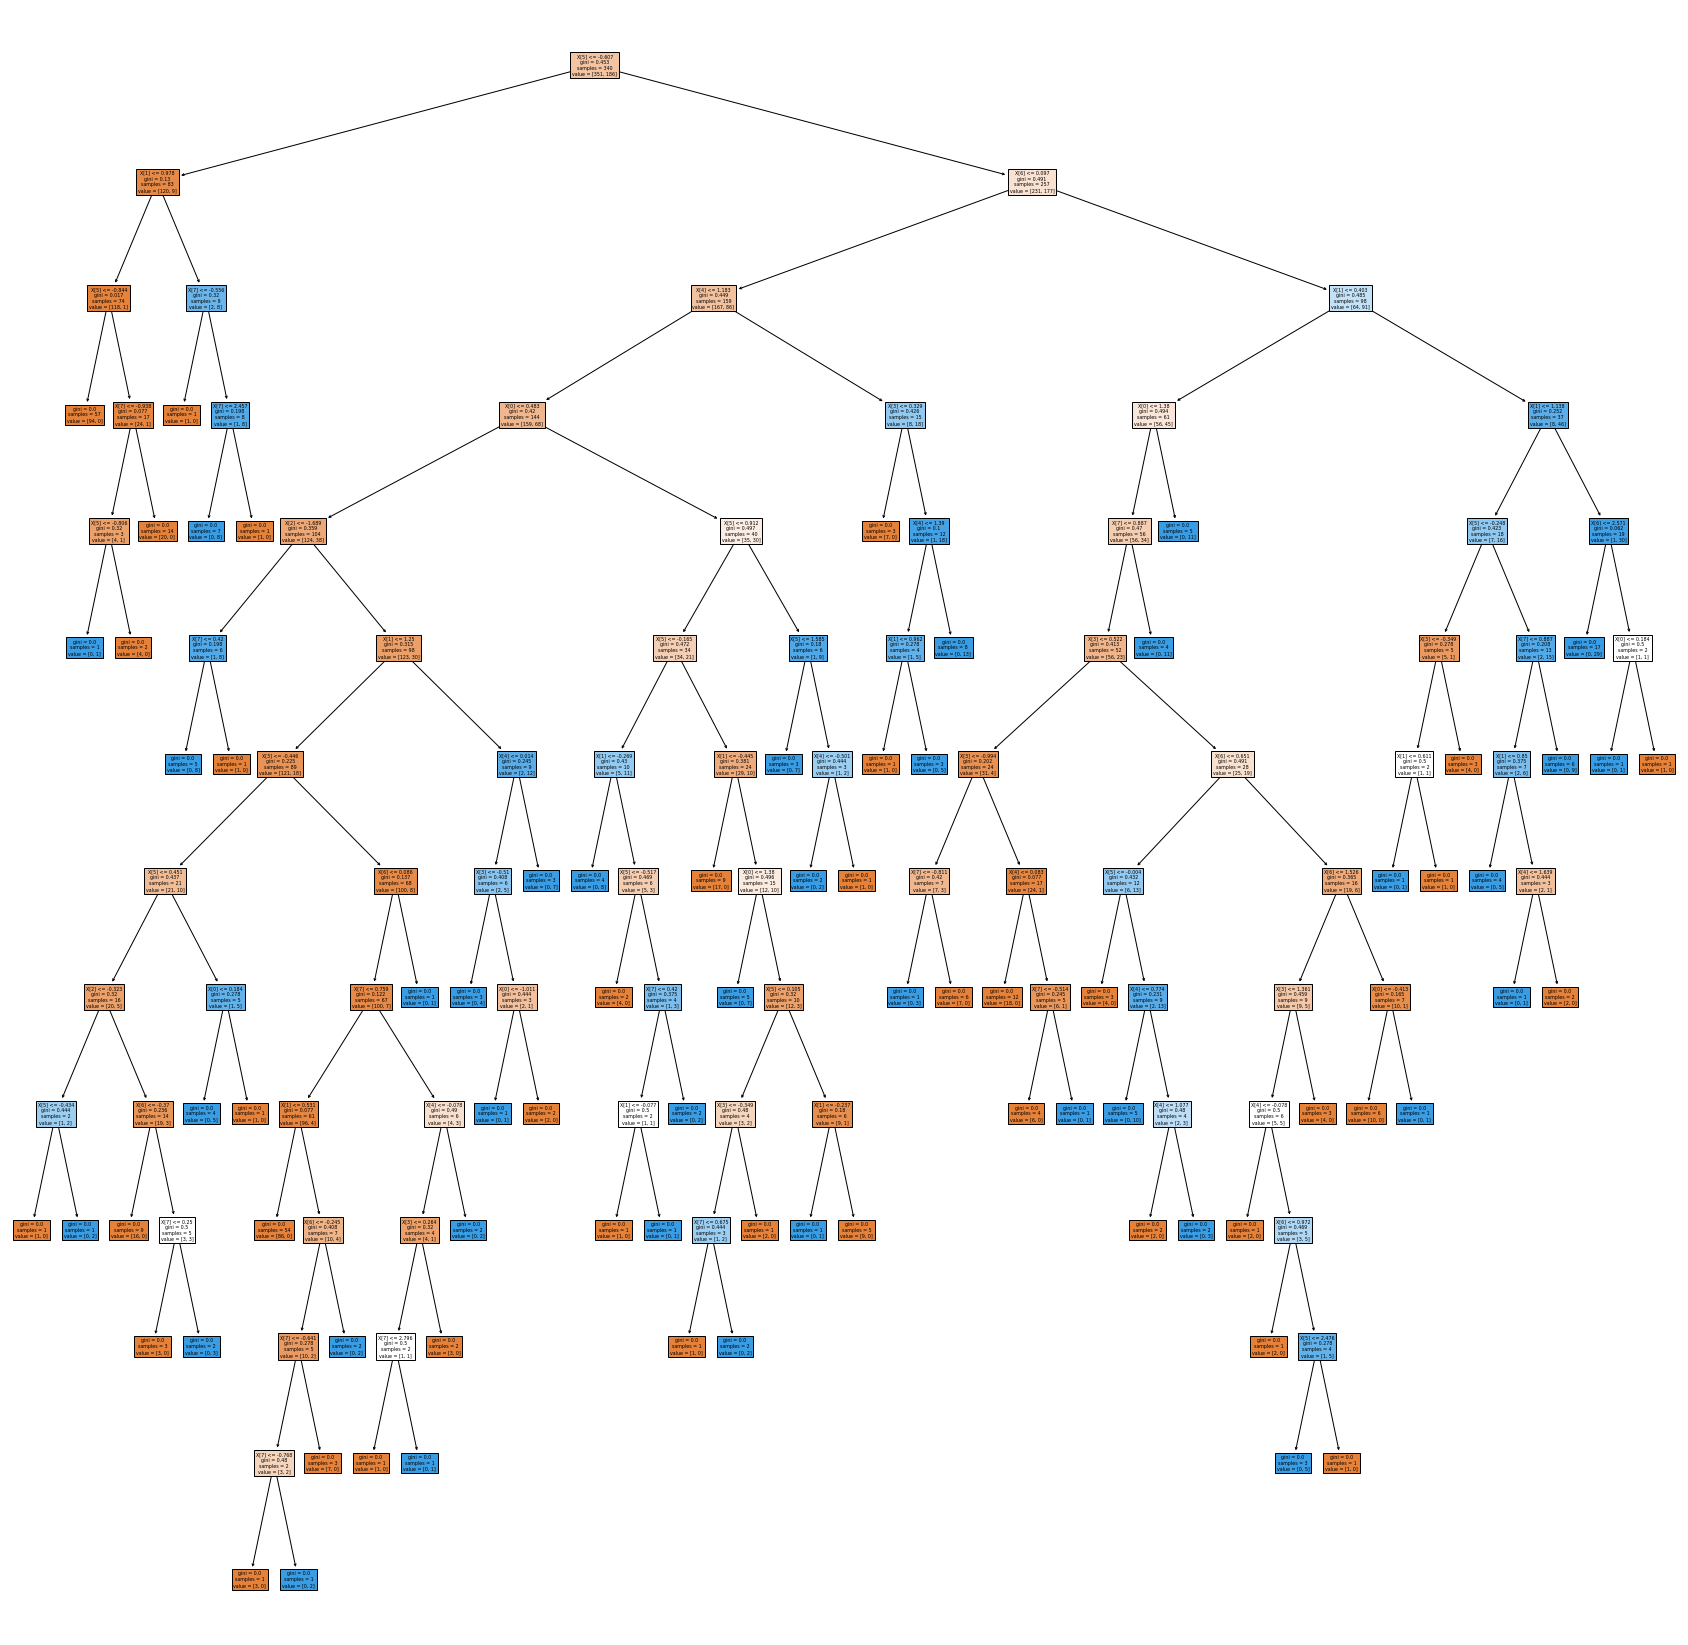

In [9]:
import matplotlib.pyplot as plt

# Plot the decision tree model
fig = plt.figure(figsize=(30,30))

# Plot the decision tree
fig = tree.plot_tree(tree_10,
              filled=True)

# Save figure
plt.savefig("tree10.svg", dpi=200)

# Display figure
plt.show()


2. How does setting bootstrap=False influence the model performance? Note: the default is
bootstrap=True. Explain why your results might be so

As diabetes data is healthcare-related, we need to pay attention out class 1 (sick) to minimize false negatives (sick people classified as health). When I changed Random Forest parameter Bootstrap to False, my model performance for class 1 increased slightly: Precision increased from 0.70 to 0.71 and Recall increased from 0.58 to 0.59. I believe that slight increase in performance is tied to the fact the dataset is somewhat imbalanced (more healthy than sick classes) - when bootstrap is True, due to imbalanced data more "healthy" samples will be picked up for model training making it harder for the model to better learn the "sick" sampless as opposed to bootstrap being False which results in training using the whole dataset including all available "sick samples. 
